Importing Libraries

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Importing Dataset

In [63]:
df=pd.read_csv('emails.csv')

In [64]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [65]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [66]:
df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [68]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Visualise Dataset

In [69]:
ham=df[df['spam']==0]

In [70]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [71]:
spam=df[df['spam']==1]

In [72]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [73]:
print("Spam Percentage: ",(len(spam)/len(df))*100,'%')

Spam Percentage:  23.88268156424581 %


In [74]:
print("Ham Percentage: ",(len(ham)/len(df))*100,'%')

Ham Percentage:  76.11731843575419 %


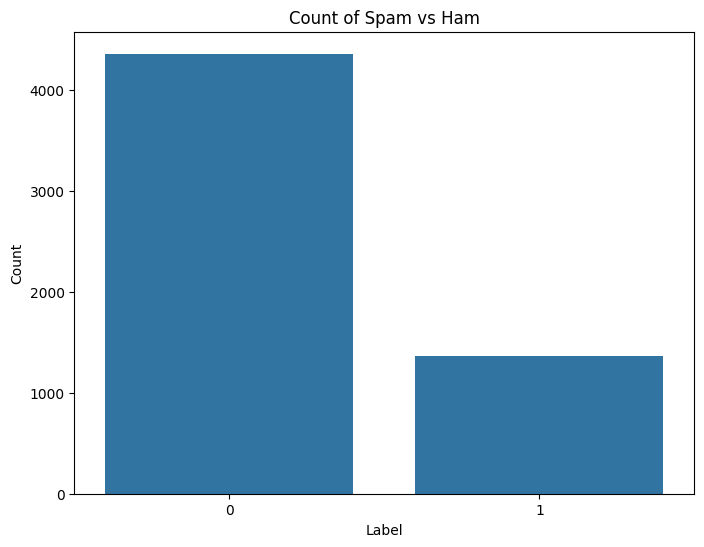

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=df)
plt.title('Count of Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Create Testing and Training Data/ Cleaning Data

Count Vectorizer Example

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data=['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

sample=CountVectorizer()

In [77]:
X=sample.fit_transform(sample_data)

In [78]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [79]:
print(sample.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Count Vectorizer to our Code

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
spamham_vectorizer=vectorizer.fit_transform(df['text'])


In [81]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [82]:
print(spamham_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [83]:
spamham_vectorizer.shape

(5728, 37303)

Training Model

In [84]:
label=df['spam'].values

In [85]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier=MultinomialNB()
nb_classifier.fit(spamham_vectorizer,label)

MultinomialNB()

In [87]:
test_sample=['Free Money!!!','Hi Kim, Please let me know']
testing_vectorizer=vectorizer.transform(test_sample)

In [88]:
nb_classifier.predict(testing_vectorizer)

array([1, 0], dtype=int64)

Divide data into Training and Testing prior to Training

In [89]:
X=spamham_vectorizer
y=label

In [90]:
X.shape

(5728, 37303)

In [91]:
y.shape

(5728,)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [93]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

Evaluating the Model

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
y_predict=nb_classifier.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

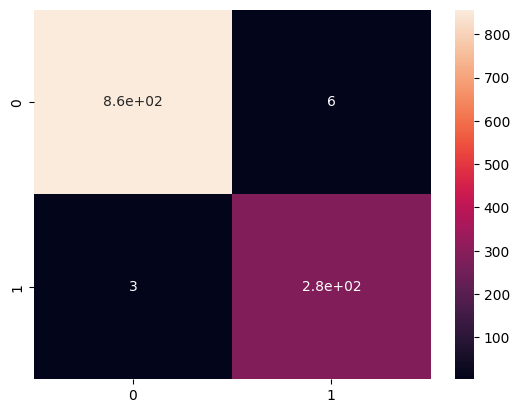

In [99]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [100]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       863
           1       0.98      0.99      0.98       283

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

